Copyright (c) 2021 [윤기태]

https://github.com/yoonkt200/learning-spoons-nano-degree

[MIT License](https://github.com/yoonkt200/learning-spoons-nano-degree/blob/master/LICENSE.txt)

# LearningSpoons - NanoDegree

-----

# 3회차 - (주문데이터, 배송데이터 분석)

- [1. 주문데이터 EDA](#1.-주문데이터-EDA)
    - [데이터 병합 및 탐색]
    - [데이터 전처리]
- [2. 시간대별 주문데이터 분석](#2.-시간대별-주문데이터-분석)
    - [시간대별 주문량 분석]
    - [시간대별 주문 지역 분석]
- [3. 주문 상품 카테고리 분석](#3.-주문-상품-카테고리-분석)
    - [상품 및 카테고리 탐색]
    - [카테고리 주문 비중 분석]
    - [시간대/일자/요일별 주문 카테고리 분석]
    - [지역별 주문 카테고리 분석]
- [4. 배송 데이터 분석](#4.-배송-데이터-분석)
    - [평균 배송 시간 분석]
    - [지역별 배송 정보 분석]
    - [예상 배송일과 실제 배송일 차이 분석]
    - [카테고리별 배송 데이터 분석]
----

In [58]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
data_dir = "../dataset/"

# 1. 주문데이터 EDA

### [데이터 병합 및 탐색]

----
#### *주문데이터 기준으로 데이터 병합*

In [60]:
order_df = pd.read_csv(data_dir + "olist_order_items_dataset.csv")
shipping_df = pd.read_csv(data_dir + "olist_orders_dataset.csv")
category_df = pd.read_csv(data_dir + "olist_products_dataset.csv")
user_df = pd.read_csv(data_dir + "olist_customers_dataset.csv")
location_df = pd.read_csv(data_dir + "olist_geolocation_dataset.csv")
product_category_name_translation_df = pd.read_csv(data_dir + "product_category_name_translation.csv")

In [61]:
order_df['order_id'] = order_df['order_id'].astype(str)
shipping_df['order_id'] = shipping_df['order_id'].astype(str)
order_df = order_df.merge(shipping_df, how='left', on='order_id')

In [62]:
order_df['product_id'] = order_df['product_id'].astype(str)
category_df['product_id'] = category_df['product_id'].astype(str)
order_df = order_df.merge(category_df, how='left', on='product_id')

In [63]:
order_df['customer_id'] = order_df['customer_id'].astype(str)
user_df['customer_id'] = user_df['customer_id'].astype(str)
order_df = order_df.merge(user_df, how='left', on='customer_id')

In [64]:
location_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.546,-46.639,sao paulo,SP
1,1046,-23.546,-46.645,sao paulo,SP
2,1046,-23.546,-46.643,sao paulo,SP
3,1041,-23.544,-46.639,sao paulo,SP
4,1035,-23.542,-46.642,sao paulo,SP


In [65]:
order_df['customer_zip_code_prefix'] = order_df['customer_zip_code_prefix'].astype(str)
location_df['geolocation_zip_code_prefix'] = location_df['geolocation_zip_code_prefix'].astype(str)
location_df.columns = ['customer_zip_code_prefix', 'lat', 'lng', 'city', 'state']
order_df = order_df.merge(location_df, how='left', on='customer_zip_code_prefix')

In [66]:
order_df['product_category_name'] = order_df['product_category_name'].astype(str)
product_category_name_translation_df['product_category_name'] = product_category_name_translation_df['product_category_name'].astype(str)
order_df = order_df.merge(product_category_name_translation_df, how='left', on='product_category_name')

In [67]:
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,lat,lng,city,state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,14.000,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758,-41.313,campos dos goytacazes,RJ,cool_stuff
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,14.000,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.759,-41.307,campos dos goytacazes,RJ,cool_stuff
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,14.000,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.767,-41.311,campos dos goytacazes,RJ,cool_stuff
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,14.000,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.772,-41.312,campos dos goytacazes,RJ,cool_stuff
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,14.000,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763,-41.306,campos dos goytacazes,RJ,cool_stuff


In [68]:
order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'lat',
       'lng', 'city', 'state', 'product_category_name_english'],
      dtype='object')

In [69]:
anal_columns = ['order_id', 'product_id', 'customer_id',
                'order_item_id', 'price', 'freight_value', 
                'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                'product_category_name_english',
                'customer_zip_code_prefix', 'lat', 'lng', 'city', 'state',
                ]

In [70]:
order_df = order_df[anal_columns]

In [71]:
order_df.head()

,order_id,product_id,customer_id,order_item_id,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,customer_zip_code_prefix,lat,lng,city,state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,1,58.900,13.290,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,28013,-21.758,-41.313,campos dos goytacazes,RJ
1,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,1,58.900,13.290,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,28013,-21.759,-41.307,campos dos goytacazes,RJ
2,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,1,58.900,13.290,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,28013,-21.767,-41.311,campos dos goytacazes,RJ
3,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,1,58.900,13.290,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,28013,-21.772,-41.312,campos dos goytacazes,RJ
4,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,1,58.900,13.290,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,28013,-21.763,-41.306,campos dos goytacazes,RJ


----
#### *데이터 정보 탐색*

In [72]:
order_df.isnull().sum()

order_id                              0
product_id                            0
customer_id                           0
order_item_id                         0
price                                 0
freight_value                         0
order_status                          0
order_purchase_timestamp              0
order_approved_at                  2994
order_delivered_customer_date    353455
order_estimated_delivery_date         0
product_category_name_english    243995
customer_zip_code_prefix              0
lat                                 302
lng                                 302
city                                302
state                               302
dtype: int64

In [73]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17196183 entries, 0 to 17196182
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   product_id                     object 
 2   customer_id                    object 
 3   order_item_id                  int64  
 4   price                          float64
 5   freight_value                  float64
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_customer_date  object 
 10  order_estimated_delivery_date  object 
 11  product_category_name_english  object 
 12  customer_zip_code_prefix       object 
 13  lat                            float64
 14  lng                            float64
 15  city                           object 
 16  state                          object 
dtypes: float64(4), int64(1), object(12)
memory u

In [74]:
order_df.describe()

,order_item_id,price,freight_value,lat,lng
count,17196183.000,17196183.000,17196183.000,17195881.000,17195881.000
mean,1.207,121.390,19.556,-21.971,-45.947
std,0.705,185.555,14.882,4.287,3.556
min,1.000,0.850,0.000,-36.605,-101.467
25%,1.000,39.900,13.470,-23.577,-47.638
50%,1.000,75.000,16.230,-22.911,-46.458
75%,1.000,135.900,20.250,-20.422,-43.352
max,21.000,6735.000,409.680,45.066,13.820


In [75]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [76]:
order_df.describe()

,order_item_id,price,freight_value,lat,lng
count,17196183.000,17196183.000,17196183.000,17195881.000,17195881.000
mean,1.207,121.390,19.556,-21.971,-45.947
std,0.705,185.555,14.882,4.287,3.556
min,1.000,0.850,0.000,-36.605,-101.467
25%,1.000,39.900,13.470,-23.577,-47.638
50%,1.000,75.000,16.230,-22.911,-46.458
75%,1.000,135.900,20.250,-20.422,-43.352
max,21.000,6735.000,409.680,45.066,13.820


In [77]:
order_df['order_status'].value_counts()

delivered      16843008
shipped          156562
canceled          76890
invoiced          60740
processing        57084
unavailable        1241
approved            658
Name: order_status, dtype: int64

In [78]:
order_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00
1,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00
2,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00
3,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00
4,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00
...,...,...,...,...
17196178,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-14 17:56:26,2018-06-28 00:00:00
17196179,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-14 17:56:26,2018-06-28 00:00:00
17196180,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-14 17:56:26,2018-06-28 00:00:00
17196181,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-14 17:56:26,2018-06-28 00:00:00


In [79]:
order_df[['city', 'state']]

,city,state
0,campos dos goytacazes,RJ
1,campos dos goytacazes,RJ
2,campos dos goytacazes,RJ
3,campos dos goytacazes,RJ
4,campos dos goytacazes,RJ
...,...,...
17196178,botucatu,SP
17196179,botucatu,SP
17196180,botucatu,SP
17196181,botucatu,SP


In [80]:
order_df['city'].value_counts()

rio de janeiro           2185517
sao paulo                1333209
belo horizonte            850346
niteroi                   455864
curitiba                  295003
                          ...   
união do sul                   1
presidente juscelino           1
missão velha                   1
são josé do campestre          1
lagoa do piaui                 1
Name: city, Length: 5801, dtype: int64

In [85]:
order_df['city'].value_counts().describe()

count      5801.000
mean       2964.296
std       37717.499
min           1.000
25%          13.000
50%          62.000
75%         468.000
max     2185517.000
Name: city, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe10487f490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe10487fbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe10487f100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe104889310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1048896a0>],
 'means': []}

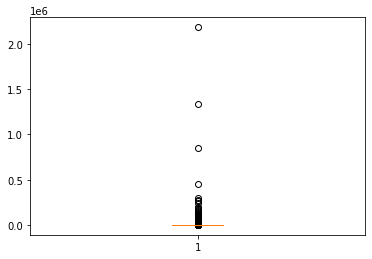

In [91]:
plt.boxplot(order_df['city'].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0c4f30bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1048ab310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0c4f30820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1048aba30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1048abdc0>],
 'means': []}

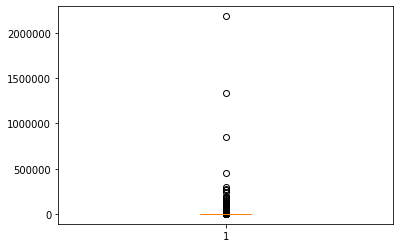

In [92]:
plt.ticklabel_format(style='plain')
plt.boxplot(order_df['city'].value_counts())

In [81]:
order_df['state'].value_counts()

SP    6396807
RJ    3443647
MG    3277695
RS     925129
PR     716308
SC     625259
BA     416850
ES     353706
GO     154963
MT     145417
PE     127671
DF     105419
PA      93342
CE      71497
MS      71107
MA      59755
AL      36573
PB      31573
SE      27214
PI      26490
RO      23767
RN      23212
TO      19888
AC       8332
AM       6267
AP       5582
RR       2411
Name: state, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0e6689d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0e669a460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0e6689970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0e669ab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0e669af10>],
 'means': []}

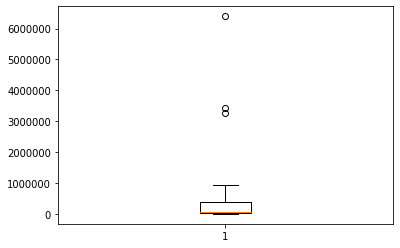

In [94]:
plt.ticklabel_format(style='plain')
plt.boxplot(order_df['state'].value_counts())

### [전처리]

----
#### *열 타입 변경*

In [95]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17196183 entries, 0 to 17196182
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   product_id                     object 
 2   customer_id                    object 
 3   order_item_id                  int64  
 4   price                          float64
 5   freight_value                  float64
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_customer_date  object 
 10  order_estimated_delivery_date  object 
 11  product_category_name_english  object 
 12  customer_zip_code_prefix       object 
 13  lat                            float64
 14  lng                            float64
 15  city                           object 
 16  state                          object 
dtypes: float64(4), int64(1), object(12)
memory u

In [105]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])

In [106]:
order_df['order_purchase_timestamp'][0]

Timestamp('2017-09-13 08:59:02')

In [113]:
order_df['order_purchase_timestamp'][0].year

2017

----
#### *배송 완료 필터링*

In [115]:
order_df['order_status'].value_counts()

delivered      16843008
shipped          156562
canceled          76890
invoiced          60740
processing        57084
unavailable        1241
approved            658
Name: order_status, dtype: int64

In [116]:
16843008 / order_df.shape[0]

0.9794620120058039

In [117]:
order_df = order_df[order_df['order_status']=='delivered']

In [118]:
order_df.shape

(16843008, 17)

----
#### *결측치 & 이상치 처리*

In [119]:
order_df.isnull().sum()

order_id                              0
product_id                            0
customer_id                           0
order_item_id                         0
price                                 0
freight_value                         0
order_status                          0
order_purchase_timestamp              0
order_approved_at                  2994
order_delivered_customer_date      1261
order_estimated_delivery_date         0
product_category_name_english    234556
customer_zip_code_prefix              0
lat                                 288
lng                                 288
city                                288
state                               288
dtype: int64

In [122]:
order_df = order_df.dropna(subset=['order_approved_at', 'order_delivered_customer_date', 'lat'])

In [123]:
order_df.isnull().sum()

order_id                              0
product_id                            0
customer_id                           0
order_item_id                         0
price                                 0
freight_value                         0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_customer_date         0
order_estimated_delivery_date         0
product_category_name_english    234382
customer_zip_code_prefix              0
lat                                   0
lng                                   0
city                                  0
state                                 0
dtype: int64

In [124]:
order_df.shape

(16838465, 17)

----
# 2. 시간대별 주문데이터 분석

### [시간대별 주문량 분석]

----
#### *주문 일자 탐색*

In [129]:
order_df['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [130]:
order_df['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

In [138]:
order_df['order_purchase_timestamp'][0].date()

datetime.date(2017, 9, 13)

In [144]:
order_df['order_purchase_date'] = order_df['order_purchase_timestamp'].apply(lambda x: x.date())

<AxesSubplot:xlabel='order_purchase_date'>

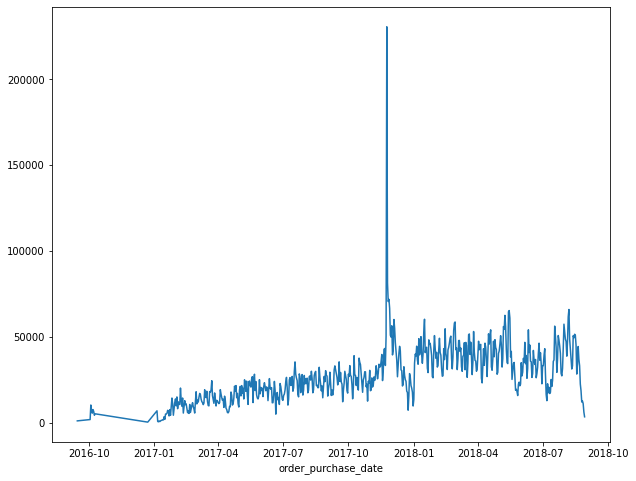

In [148]:
plt.rcParams['figure.figsize'] = [10, 8]
order_df.groupby('order_purchase_date')['order_id'].count().plot()

----
#### *주문 시간 탐색*

In [158]:
order_df['order_purchase_hour'] = order_df['order_purchase_timestamp'].apply(lambda x: x.hour)

<AxesSubplot:xlabel='order_purchase_hour'>

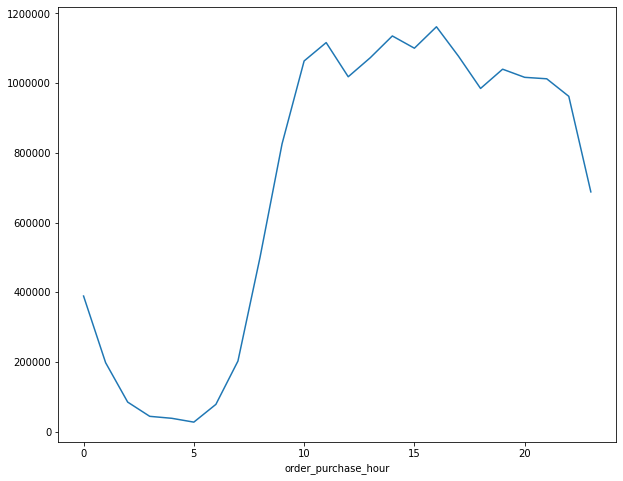

In [181]:
plt.ticklabel_format(style='plain')
plt.rcParams['figure.figsize'] = [10, 8]
order_df.groupby('order_purchase_hour')['order_id'].count().plot()

----
#### *주문 요일별 탐색*

In [168]:
order_df['order_purchase_timestamp'][0]

Timestamp('2017-09-13 08:59:02')

In [169]:
order_df['order_purchase_timestamp'][0].strftime("%A")

'Wednesday'

In [170]:
order_df['order_purchase_day_name'] = order_df['order_purchase_timestamp'].apply(lambda x: x.strftime("%A"))

In [176]:
order_purchase_day_name = order_df.groupby('order_purchase_day_name')['order_id'].count()

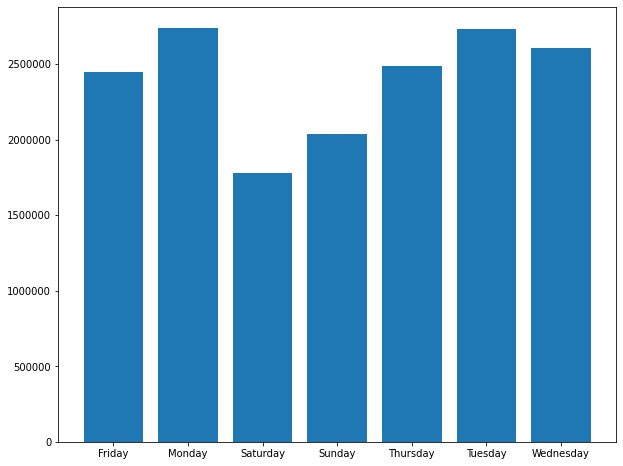

In [182]:
plt.ticklabel_format(style='plain')
plt.bar(order_purchase_day_name.index, order_purchase_day_name.values)
plt.show()

### [시간대별 주문 지역 분석]